# **1. 단항 선형 회귀 실습**
- 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
torch.manual_seed(49)

In [3]:
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(X_train, X_train.shape)
print(y_train, y_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]]) torch.Size([3, 1])


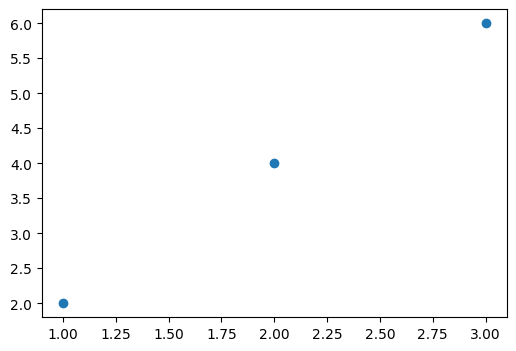

In [4]:
plt.figure(figsize = (6, 4))
plt.scatter(X_train, y_train)

In [5]:
# 저 직선의 방정식을 우리가 한 번 구해보자!
# y = ax + b -> y = Wx + b

# 모델을 구성하기 전에, 껍데기만 만들거에요!
# 선형을 만드는 친구 Linear()
model = nn.Linear(1, 1) # 입력과 출력 갯수
model

Linear(in_features=1, out_features=1, bias=True)

In [6]:
# 학습하고 예측을 시켜보자!

# 파이토치는 일단 시작할 때 W와 b값을 랜덤하게 넣어준다.
y_pred = model(X_train)
y_pred

tensor([[-1.3528],
        [-2.2590],
        [-3.1652]], grad_fn=<AddmmBackward0>)

In [7]:
list(model.parameters()) # W : [-0.6713], b : [0.6921]

[Parameter containing:
 tensor([[-0.9062]], requires_grad=True),
 Parameter containing:
 tensor([-0.4466], requires_grad=True)]

In [8]:
# MSE 실제와 예측값의 오차에 제곱!
((y_pred - y_train) ** 2).mean()

tensor(44.8054, grad_fn=<MeanBackward0>)

In [9]:
# 파이토치 내에 있는 함수 사용!
loss = nn.MSELoss()(y_pred, y_train)
loss

tensor(44.8054, grad_fn=<MseLossBackward0>)

In [10]:
# W : [-0.6713], b : [0.6921]
print(-0.6713 * 1 + 0.6921)
print(-0.6713 * 2 + 0.6921)
print(-0.6713 * 3 + 0.6921)

# 원래 랜덤하게 선이 그어져 있는데, 데이터를 하나씩 전달하면서 이 로스값을 점점 줄여나가야한다!
# 우리의 목표 mse, rmse 던지 로스값이 가장 작은 직선을 그어주는 식을 만드는 것.
# 이걸 해낼 수 있었던 알고리즘이 경사하강법!

0.02080000000000004
-0.6505
-1.3218


### 1-1. 경사하강법(Gradient Descent)
- 비용 함수 값을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저(최적화) 알고리즘이라고 함
- 경사 하강법은 가장 기본적인 옵티마이저 알고리즘
- 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 "학습"이라고 부름

<img src = 'https://i.imgur.com/0fW4LTG.png' width = 500>

```
정리
편미분을 구해서 방향을 잡아주고
편미분에서 나온 값을 계속 최적의 값을 구하는데 사용한다.
근데 편미분 값이 커서, 넘어갈 수도 있고, 튈 수 있다.
그래서 조금씩 내리기 위해서 특정 값을 곱해준다.
여기서 저 특정값을 학습률이라고 한다.
```

In [11]:
'''
SGD(Stochastic Gradient Descent)
- 랜덤하게 데이터를 하나씩 뽑아서 loss를 만듦
- 하나만 보고 빠르게 방향 결정
- 다 뽑고 다시 데이터를 넣고 반복
'''

optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [12]:
# 로스값 계산 객체
loss = nn.MSELoss()(y_pred, y_train)

In [13]:
# 핵심!

# gradient 를 0 으로 초기화
optimizer.zero_grad()

# 비용 함수를 미분하여 기울기 계산
# 실제 계산식을 얻어냄.
loss.backward()

# W와 b를 업데이트!
optimizer.step()

print(list(model.parameters())) # W : [-0.6713], b : [0.6921]

[Parameter containing:
tensor([[-0.6171]], requires_grad=True), Parameter containing:
tensor([-0.3214], requires_grad=True)]


In [14]:
# 반복 학습을 통해 틀린 W, b를 수정하면서 오차를 줄여나가자.
# epochs : 반복 학습 횟수
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(X_train)
  loss = nn.MSELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss : {loss : .4f}')

Epoch: 0/1000 Loss :  35.4305
Epoch: 100/1000 Loss :  0.0429
Epoch: 200/1000 Loss :  0.0265
Epoch: 300/1000 Loss :  0.0164
Epoch: 400/1000 Loss :  0.0101
Epoch: 500/1000 Loss :  0.0062
Epoch: 600/1000 Loss :  0.0039
Epoch: 700/1000 Loss :  0.0024
Epoch: 800/1000 Loss :  0.0015
Epoch: 900/1000 Loss :  0.0009
Epoch: 1000/1000 Loss :  0.0006


In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[1.9725]], requires_grad=True),
 Parameter containing:
 tensor([0.0625], requires_grad=True)]

In [16]:
X_test = torch.FloatTensor([[7]])
y_pred = model(X_test)
print(y_pred)

tensor([[13.8700]], grad_fn=<AddmmBackward0>)


# **2. 다중 선형 회귀 실습**
- 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [17]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[150], [190], [180], [200], [130]])

print(X_train, X_train.shape)
print(y_train, y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]]) torch.Size([5, 3])
tensor([[150.],
        [190.],
        [180.],
        [200.],
        [130.]]) torch.Size([5, 1])


In [18]:
model = nn.Linear(3, 1) # 입력과 출력 갯수
model

Linear(in_features=3, out_features=1, bias=True)

In [19]:
# 독립변수가 3개
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2912,  0.4927, -0.4136]], requires_grad=True), Parameter containing:
tensor([0.2531], requires_grad=True)]


In [21]:
optimizer = optim.SGD(model.parameters(), lr = 0.00001)

In [23]:
# 반복 학습을 통해 틀린 W, b를 수정하면서 오차를 줄여나가자.
# epochs : 반복 학습 횟수
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(X_train)
  loss = nn.MSELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss : {loss : .4f}')

Epoch: 0/1000 Loss :  35.1759
Epoch: 100/1000 Loss :  34.9931
Epoch: 200/1000 Loss :  34.8152
Epoch: 300/1000 Loss :  34.6419
Epoch: 400/1000 Loss :  34.4729
Epoch: 500/1000 Loss :  34.3081
Epoch: 600/1000 Loss :  34.1473
Epoch: 700/1000 Loss :  33.9903
Epoch: 800/1000 Loss :  33.8369
Epoch: 900/1000 Loss :  33.6869
Epoch: 1000/1000 Loss :  33.5402


In [24]:
# 처음 것과 비교!
print(list(model.parameters()))

# 원래 방정식!
# W : [-0.2912,  0.4927, -0.4136]
# b : [0.2531]

[Parameter containing:
tensor([[0.4537, 1.0320, 0.5207]], requires_grad=True), Parameter containing:
tensor([0.2378], requires_grad=True)]


In [26]:
# 테스트
X_test = torch.FloatTensor([[92, 92, 92]])
y_pred = model(X_test)
print(y_pred)

tensor([[184.8265]], grad_fn=<AddmmBackward0>)


# **3. temps.csv 데이터에서 기온에 따른 지면 온도를 예측해보기**

In [27]:
import pandas as pd

In [35]:
df = pd.read_csv('/content/drive/MyDrive/파이썬AI프로젝트202307/5_컴퓨터 비전/temps.csv', encoding = 'euc-kr')
df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [36]:
df.isnull().mean()

지점          0.000000
지점명         0.000000
일시          0.000000
기온(°C)      0.000342
지면온도(°C)    0.000000
dtype: float64

In [38]:
df = df.dropna()

In [39]:
df.isnull().mean()

지점          0.0
지점명         0.0
일시          0.0
기온(°C)      0.0
지면온도(°C)    0.0
dtype: float64

In [49]:
# 단항 선형 회귀를 만들어보자!

df.columns


X_data = df[['기온(°C)']]
y_data = df[['지면온도(°C)']]

# 데이터프레임을 텐서로 변환할 때는 values 를 찍어서 값을 전달해줘야한다.
X_data = torch.FloatTensor(X_data.values)
y_data = torch.FloatTensor(y_data.values)

print(X_data.shape)
print(y_data.shape)

torch.Size([8779, 1])
torch.Size([8779, 1])


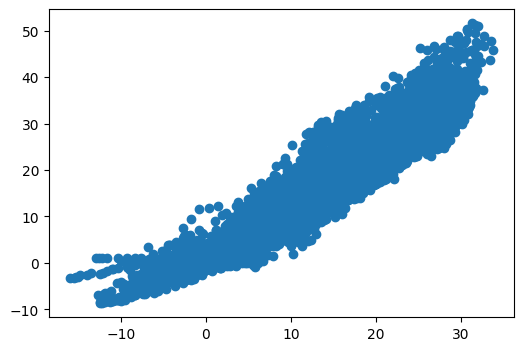

In [51]:
plt.figure(figsize = (6, 4))
plt.scatter(X_data, y_data)

In [53]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.8377]], requires_grad=True), Parameter containing:
tensor([0.3506], requires_grad=True)]


In [55]:
# 반복 학습을 통해 틀린 W, b를 수정하면서 오차를 줄여나가자.
# epochs : 반복 학습 횟수
epochs = 3000

for epoch in range(epochs + 1):
  y_pred = model(X_data)
  loss = nn.MSELoss()(y_pred, y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss : {loss : .4f}')

Epoch: 0/3000 Loss :  31.4782
Epoch: 100/3000 Loss :  13.0283
Epoch: 200/3000 Loss :  13.0175
Epoch: 300/3000 Loss :  13.0084
Epoch: 400/3000 Loss :  13.0006
Epoch: 500/3000 Loss :  12.9940
Epoch: 600/3000 Loss :  12.9883
Epoch: 700/3000 Loss :  12.9836
Epoch: 800/3000 Loss :  12.9795
Epoch: 900/3000 Loss :  12.9760
Epoch: 1000/3000 Loss :  12.9731
Epoch: 1100/3000 Loss :  12.9706
Epoch: 1200/3000 Loss :  12.9685
Epoch: 1300/3000 Loss :  12.9666
Epoch: 1400/3000 Loss :  12.9651
Epoch: 1500/3000 Loss :  12.9638
Epoch: 1600/3000 Loss :  12.9627
Epoch: 1700/3000 Loss :  12.9617
Epoch: 1800/3000 Loss :  12.9609
Epoch: 1900/3000 Loss :  12.9603
Epoch: 2000/3000 Loss :  12.9597
Epoch: 2100/3000 Loss :  12.9592
Epoch: 2200/3000 Loss :  12.9588
Epoch: 2300/3000 Loss :  12.9584
Epoch: 2400/3000 Loss :  12.9581
Epoch: 2500/3000 Loss :  12.9578
Epoch: 2600/3000 Loss :  12.9576
Epoch: 2700/3000 Loss :  12.9574
Epoch: 2800/3000 Loss :  12.9573
Epoch: 2900/3000 Loss :  12.9571
Epoch: 3000/3000 Loss 

In [56]:
print(list(model.parameters()))
# 원래 랜덤하게 부여된 방정식
# W : [0.8377]
# b : [0.3506]

[Parameter containing:
tensor([[1.0873]], requires_grad=True), Parameter containing:
tensor([0.7800], requires_grad=True)]


In [59]:
# detach() : 연산 이력이 반영된 새로운 텐서를 반환
# 별도의 텐서를 만든다라고 생각해도 무관.
y_pred = model(X_data).detach().numpy()
y_pred

array([[-8.679727 ],
       [-7.1574745],
       [-6.50508  ],
       ...,
       [-7.1574745],
       [-9.005923 ],
       [-9.223388 ]], dtype=float32)

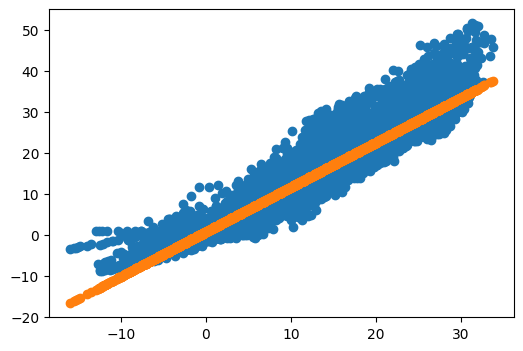

In [61]:
plt.figure(figsize = (6, 4))
plt.scatter(X_data, y_data)
plt.scatter(X_data, y_pred)